In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import bibliotek

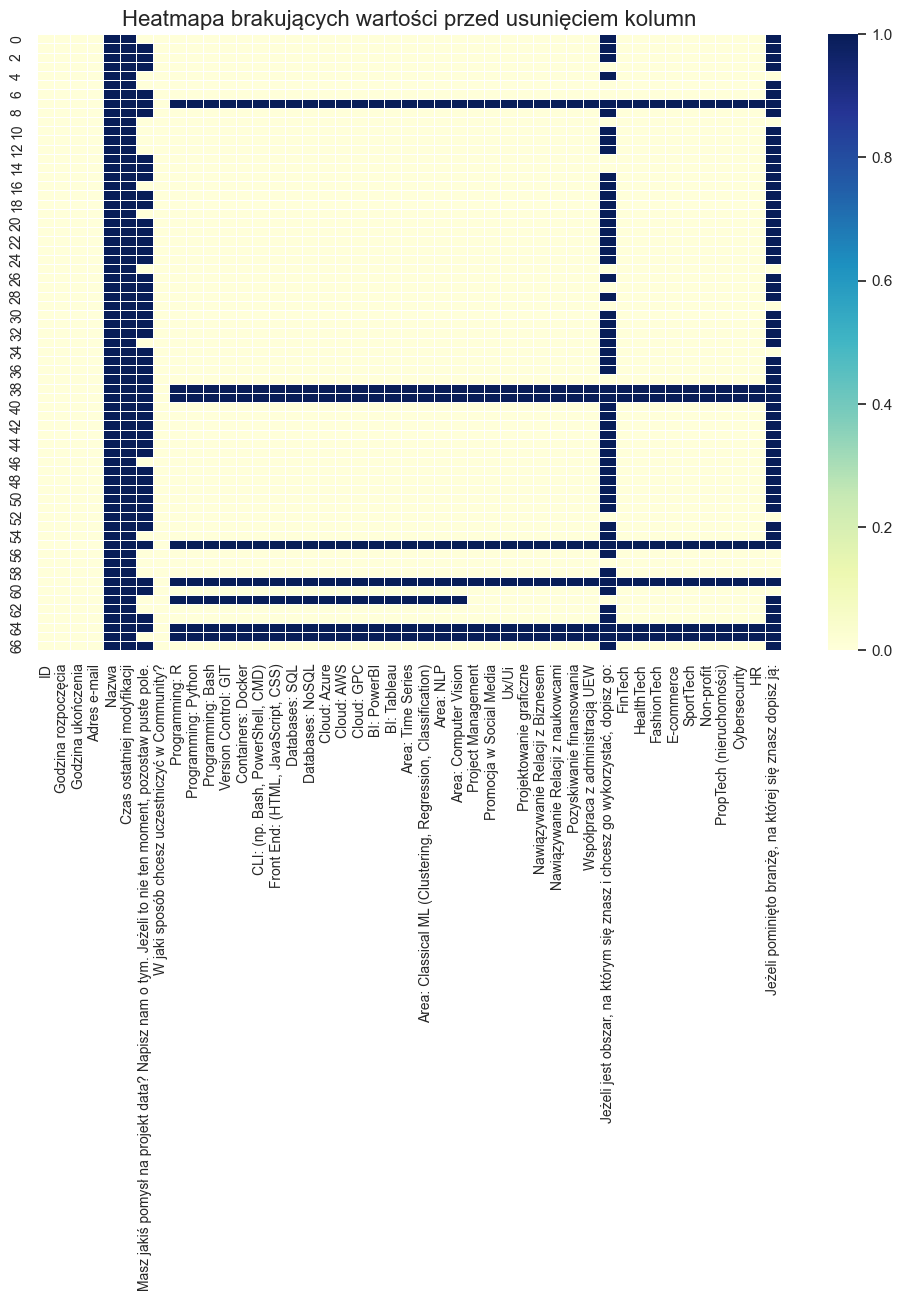

       Programming: R  Programming: Python  Programming: Bash  \
count       59.000000            59.000000          59.000000   
mean         1.847458             2.593220           1.305085   
std          1.047387             0.697746           1.192711   
min          0.000000             1.000000           0.000000   
25%          1.000000             2.000000           0.000000   
50%          2.000000             3.000000           1.000000   
75%          2.000000             3.000000           2.000000   
max          4.000000             4.000000           4.000000   

       Version Control: GIT  Containers: Docker  \
count             59.000000           59.000000   
mean               1.983051            1.372881   
std                1.252467            1.230339   
min                0.000000            0.000000   
25%                1.500000            0.000000   
50%                2.000000            2.000000   
75%                3.000000            2.000000   
max   

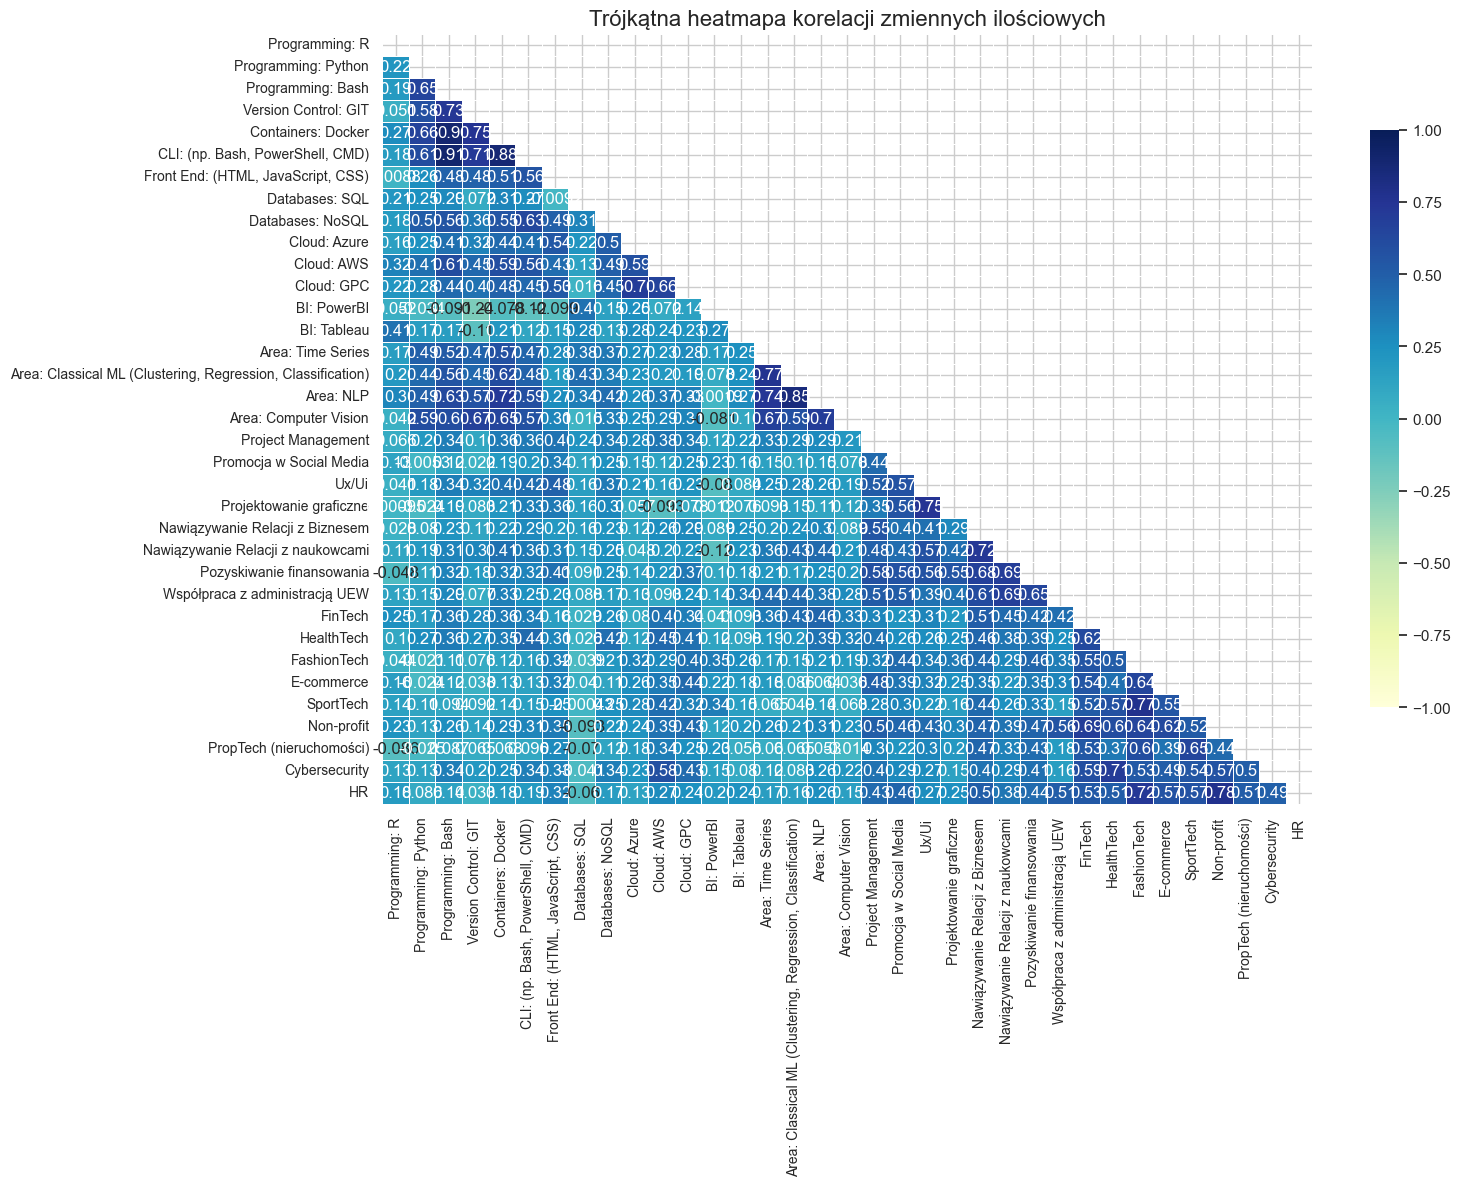

In [27]:
# Wczytanie danych z pliku Excel
file_path = r"C:\Users\xbots\Projekt-people-analytics\data\01_Raw\DataCompetencySurvey.xlsx"
data = pd.read_excel(file_path)

# Zmiana typu danych w kolumnie ID na tekstowy
data['ID'] = data['ID'].astype(str)

# Ustawienie stylu wykresów
sns.set(style="whitegrid", context="notebook")

# Heatmapa brakujących wartości przed usunięciem kolumn
plt.figure(figsize=(12, 8))
sns.heatmap(data.isnull(), cbar=True, cmap='YlGnBu', linewidths=0.5)
plt.title('Heatmapa brakujących wartości przed usunięciem kolumn', fontsize=16)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# Usunięcie niepotrzebnych kolumn
data_cleaned = data.drop(['Godzina rozpoczęcia','Godzina ukończenia','Adres e-mail','Nazwa','Czas ostatniej modyfikacji',
                                   'Masz jakiś pomysł na projekt data? Napisz nam o tym. Jeżeli to nie ten moment, pozostaw puste pole.',],axis=1)

# Zmiana nazw kolumn dla łatwiejszej obsługi
data_cleaned.rename(columns={
    "ID": "Participant ID",
    "W jaki sposób chcesz uczestniczyć w Community?": "Community Participation"
}, inplace=True)

# Filtrowanie danych do analizy korelacji
data_filtered = data_cleaned[data_cleaned["Community Participation"] != 'Póki co chcę czerpać, obserwować, "konsumować content"']

# Analiza korelacji zmiennych ilościowych
numerical_data = data_filtered.select_dtypes(include=['number'])

# Sprawdzenie danych po filtracji
print(numerical_data.describe())

# Tworzenie trójkątnej heatmapy korelacji
correlation_matrix = numerical_data.corr()

# Maskowanie górnej trójkątnej części macierzy
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', linewidths=0.5, vmin=-1, vmax=1, mask=mask, cbar_kws={"shrink": .75})
plt.title('Trójkątna heatmapa korelacji zmiennych ilościowych', fontsize=16)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.show()